In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Data Understanding

In [54]:
loan = pd.read_csv('loan.csv',encoding='utf8',error_bad_lines=False,engine='python')
loan.shape

C:\Users\SunaynaPC\AppData\Local\Temp\ipykernel_35428\3927912661.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  loan = pd.read_csv('loan.csv',encoding='utf8',error_bad_lines=False,engine='python')


(39717, 111)

__Checking Rows With null entries__

In [55]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### Data Cleaning and Manipulation

__Removing records where null percentage__ 

In [56]:
#Removing records where null percentage 
null_percentage=loan.isnull().sum()/loan.shape[0]
columns=null_percentage[null_percentage>0.90].keys()
loan=loan.drop(columns,axis=1)
loan.shape

(39717, 55)

__cleaning irrelevant columns__

In [57]:
#cleaning irrelevant columns having null values
loan=loan.drop("mths_since_last_delinq",axis=1)
loan=loan.drop("desc",axis=1)

#cleaning irrelevant columns
loan=loan.drop("url",axis=1)
loan=loan.drop("zip_code",axis=1)

#Removed title as purpose already providing same info
loan=loan.drop("title",axis=1)


#no categorization available in the columns
loan=loan.drop("initial_list_status",axis=1)
loan=loan.drop("policy_code",axis=1)
loan=loan.drop("pymnt_plan",axis=1)
loan=loan.drop("application_type",axis=1)
loan=loan.drop("acc_now_delinq",axis=1)
loan=loan.drop("chargeoff_within_12_mths",axis=1)
loan=loan.drop("delinq_amnt",axis=1)
loan=loan.drop("tax_liens",axis=1)
loan=loan.drop("collections_12_mths_ex_med",axis=1)


#Customer behavior variables
loan=loan.drop("delinq_2yrs",axis=1)
loan=loan.drop("earliest_cr_line",axis=1)
loan=loan.drop("inq_last_6mths",axis=1)
loan=loan.drop("open_acc",axis=1)
loan=loan.drop("revol_bal",axis=1)
loan=loan.drop("revol_util",axis=1)
loan=loan.drop("total_acc",axis=1)
loan=loan.drop("out_prncp",axis=1)
loan=loan.drop("out_prncp_inv",axis=1)
loan=loan.drop("total_pymnt",axis=1)
loan=loan.drop("total_pymnt_inv",axis=1)
loan=loan.drop("total_rec_prncp",axis=1)
loan=loan.drop("total_rec_int",axis=1)
loan=loan.drop("total_rec_late_fee",axis=1)
loan=loan.drop("recoveries",axis=1)
loan=loan.drop("collection_recovery_fee",axis=1)
loan=loan.drop("last_pymnt_d",axis=1)
loan=loan.drop("last_pymnt_amnt",axis=1)
loan=loan.drop("last_credit_pull_d",axis=1)

loan.shape

(39717, 22)

__Imputing null values__

In [59]:
#Filling with Unknown where employee title is not present
loan["emp_title"]=loan["emp_title"].fillna("Unkown")

In [60]:
loan["pub_rec"].corr(loan["pub_rec_bankruptcies"])

0.8473050197507596

In [61]:
#Based on correlation between these two variables substituting the values
loan["pub_rec_bankruptcies"]=loan["pub_rec_bankruptcies"].fillna(loan["pub_rec"])
loan=loan.drop("pub_rec",axis=1)
loan.shape

(39717, 21)

In [62]:
#Filling with Unknown where employee length is not present
loan["emp_length"]=loan["emp_length"].fillna("Unkown")

__Refining Values to get new columns__

In [63]:
#Refining values
loan["int_rate"]=loan["int_rate"].str.replace('%','').astype(float)
loan["term"]=loan["term"].str.replace(' months','').astype(int)
loan.shape

(39717, 21)

In [64]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

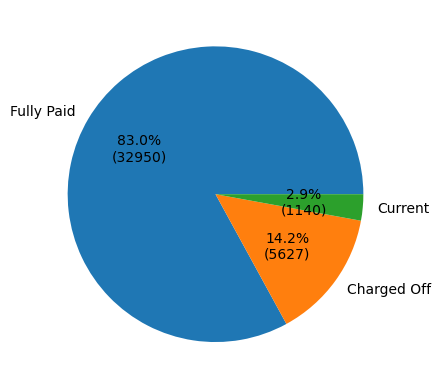

In [65]:
loan_data=loan['loan_status'].value_counts()
plt.pie(loan_data,labels = loan_data.index,autopct=autopct_format(loan_data))
plt.show()

__Removing undeterministic value__

In [66]:
#Removing loan status as current as it doesn't provide input to problem statement
loan.drop(loan[loan['loan_status']== 'Current'].index, inplace = True)
loan.shape
final_loan_data_cleaned=loan
final_loan_data_cleaned.dtypes

id                        int64
member_id                 int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                      int32
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

#### Data Analysis

##### Data Undestanding after cleaning
__Checking number of categorical and numerical columns available__

In [67]:
numeric_data = final_loan_data_cleaned.select_dtypes(include = [np.number])

categorical_data = final_loan_data_cleaned.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features in the loan data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 11 numerical and 10 categorical features in the loan data


###### Univariate Analysis

In [38]:
final_loan_data_cleaned.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies
count,2.665500e+04,2.665500e+04,26655.000000,26655.000000,26655.000000,26655.000000,26655.000000,26655.000000,2.665500e+04,26655.000000,26655.000000
mean,7.815217e+05,9.796598e+05,11485.051585,11220.310448,11044.012210,43.799212,11.951799,323.859638,6.897814e+04,13.608728,0.044532
std,1.560194e+05,1.779332e+05,7752.964327,7476.835234,7328.070792,11.240913,4.028053,211.114114,5.087821e+04,6.677735,0.207004
min,6.694300e+04,1.829350e+05,1000.000000,1000.000000,400.000000,36.000000,5.420000,20.220000,4.800000e+03,0.000000,0.000000
25%,6.453655e+05,8.254890e+05,5500.000000,5500.000000,5475.000000,36.000000,8.490000,165.910000,4.104300e+04,8.430000,0.000000
50%,7.639310e+05,9.639800e+05,10000.000000,10000.000000,9675.000000,36.000000,11.710000,279.920000,6.000000e+04,13.680000,0.000000
75%,8.819945e+05,1.096600e+06,15000.000000,15000.000000,14975.000000,60.000000,14.840000,425.100000,8.319600e+04,18.870000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,1.900000e+06,29.990000,2.000000


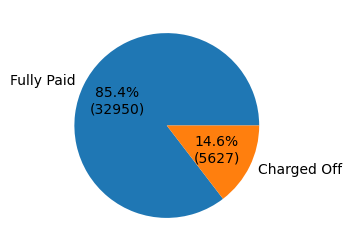

In [68]:
final_loan=final_loan_data_cleaned['loan_status'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(final_loan,labels = final_loan.index,autopct=autopct_format(final_loan))
plt.show()

__Checking All numerical variables__

Checking outliers for requested loan amount, funded amount suggested and funded amount approved by investers

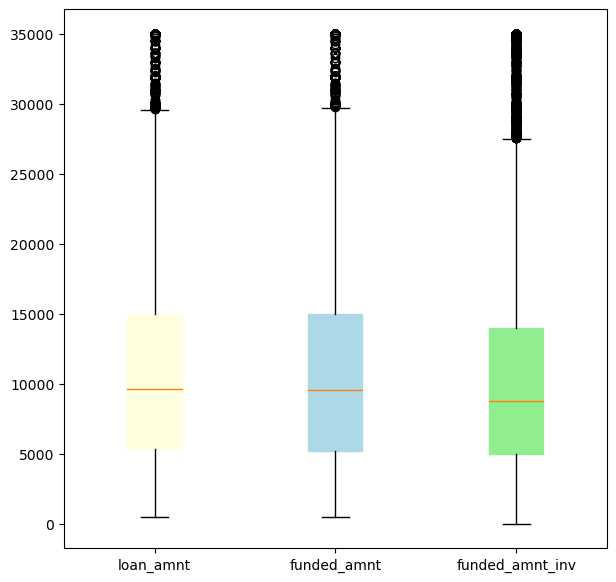

In [69]:
plt.figure(figsize=(7, 7))
colors = ['lightyellow', 'lightblue', 'lightgreen']
box=plt.boxplot(final_loan_data_cleaned[['loan_amnt','funded_amnt','funded_amnt_inv']],patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_color(color)
plt.xticks([1,2,3],['loan_amnt','funded_amnt','funded_amnt_inv'])
plt.show()

checking loan amount distribution and amounts which have higher number of requests

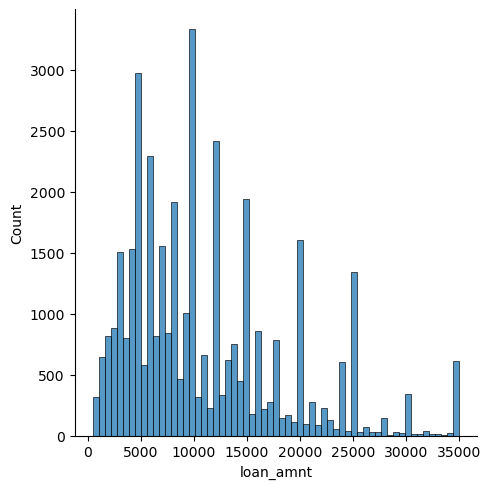

In [70]:
loan_amnt_dist = final_loan_data_cleaned["loan_amnt"]
sns.displot(loan_amnt_dist)

Box Plot to compare annual income and requested loan amount

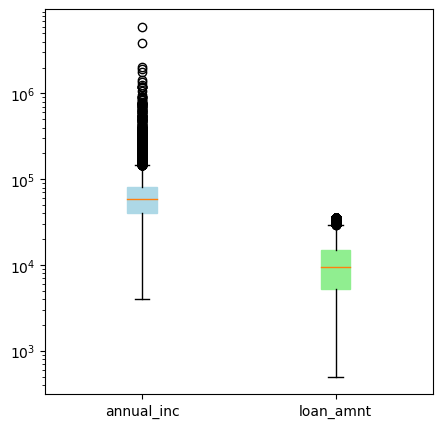

In [71]:
plt.figure(figsize=(5, 5))
plt.yscale('log')
colors = ['lightblue', 'lightgreen']
box=plt.boxplot(final_loan_data_cleaned[['annual_inc','loan_amnt']],patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_color(color)
plt.xticks([1,2],['annual_inc','loan_amnt'])
plt.show()

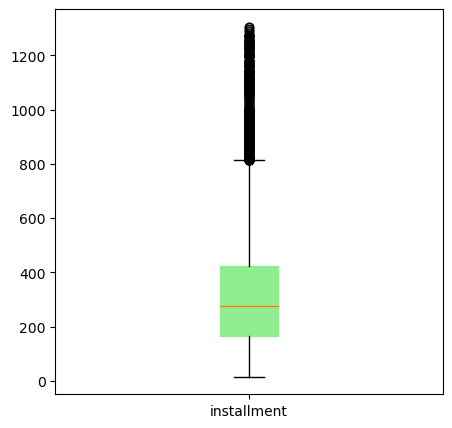

In [72]:
plt.figure(figsize=(5, 5))
box=plt.boxplot(final_loan_data_cleaned[['installment']],patch_artist=True)
box['boxes'][0].set_color('lightgreen')
plt.xticks([1],['installment'])
plt.show()

Box Plot to check outliers in dti

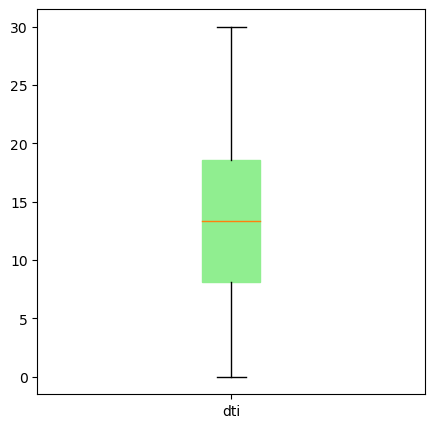

In [73]:
plt.figure(figsize=(5, 5))
box=plt.boxplot(final_loan_data_cleaned[['dti']],patch_artist=True)
box['boxes'][0].set_color('lightgreen')
plt.xticks([1],['dti'])
plt.show()

__removing outliers in income, installment, loan amount, funded amount and funded amount inv
Same with installment__

In [74]:
final_loan_data_cleaned = final_loan_data_cleaned[final_loan_data_cleaned["annual_inc"] < final_loan_data_cleaned["annual_inc"].quantile(0.99)]
final_loan_data_cleaned["annual_inc"].describe()

count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64

In [75]:
final_loan_data_cleaned = final_loan_data_cleaned[final_loan_data_cleaned["installment"] < final_loan_data_cleaned["installment"].quantile(0.99)]
final_loan_data_cleaned["installment"].describe()

count    37809.000000
mean       312.538108
std        192.994925
min         15.690000
25%        164.560000
50%        273.780000
75%        413.710000
max        920.850000
Name: installment, dtype: float64

In [76]:
final_loan_data_cleaned = final_loan_data_cleaned[final_loan_data_cleaned["loan_amnt"] < final_loan_data_cleaned["loan_amnt"].quantile(0.99)]
final_loan_data_cleaned["loan_amnt"].describe()

count    37413.000000
mean     10490.477241
std       6545.382409
min        500.000000
25%       5000.000000
50%       9300.000000
75%      15000.000000
max      31825.000000
Name: loan_amnt, dtype: float64

In [77]:
final_loan_data_cleaned = final_loan_data_cleaned[final_loan_data_cleaned["funded_amnt"] < final_loan_data_cleaned["funded_amnt"].quantile(0.99)]
final_loan_data_cleaned["funded_amnt"].describe()

count    37035.000000
mean     10062.051438
std       6055.432555
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      27525.000000
Name: funded_amnt, dtype: float64

In [78]:
final_loan_data_cleaned = final_loan_data_cleaned[final_loan_data_cleaned["funded_amnt_inv"] < final_loan_data_cleaned["funded_amnt_inv"].quantile(0.99)]
final_loan_data_cleaned["funded_amnt_inv"].describe()

count    36643.000000
mean      9351.307474
std       5801.819214
min          0.000000
25%       4975.000000
50%       8000.000000
75%      12889.555435
max      24974.448730
Name: funded_amnt_inv, dtype: float64

Correlation heatmap

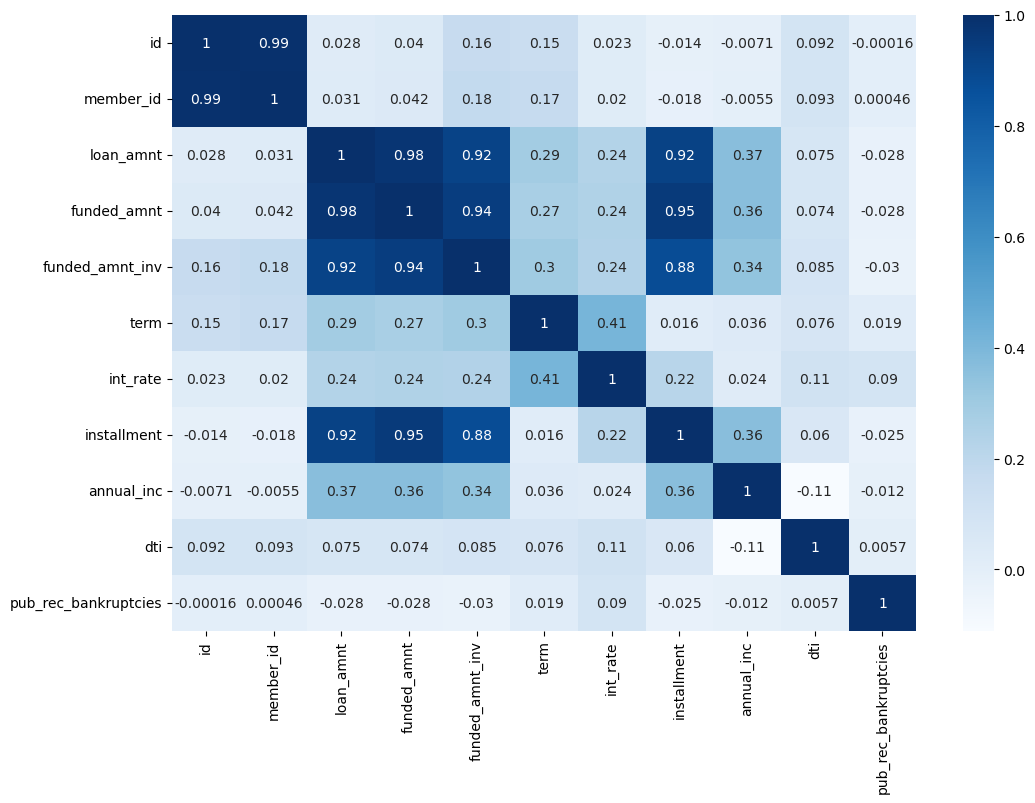

In [123]:
heatmap_data=final_loan_data_cleaned.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(heatmap_data, 
            xticklabels=heatmap_data.columns.values,
            yticklabels=heatmap_data.columns.values,annot= True,cmap="Blues")
plt.show() 

Getting purpose count mapping

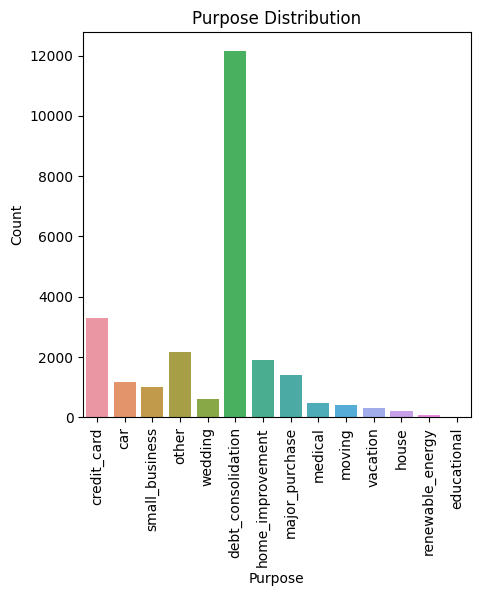

In [50]:
plt.figure(figsize=(5, 5))
sns.countplot(x=final_loan_data_cleaned["purpose"])
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Purpose Distribution')
plt.xticks(rotation = 90)
plt.show()

Getting Loan distribution

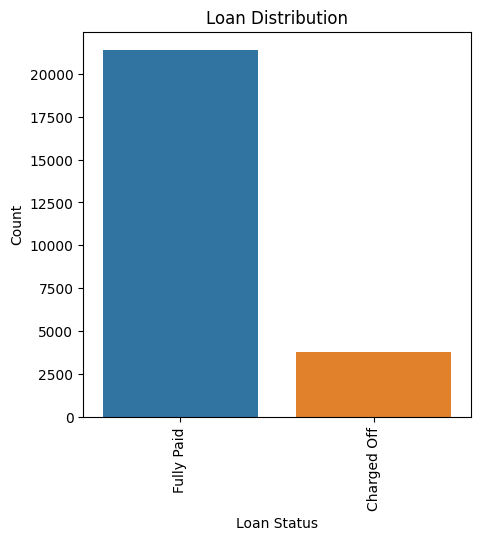

In [51]:
plt.figure(figsize=(5, 5))
sns.countplot(x=final_loan_data_cleaned["loan_status"])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Distribution')
plt.xticks(rotation = 90)
plt.show()

Home ownership distribution

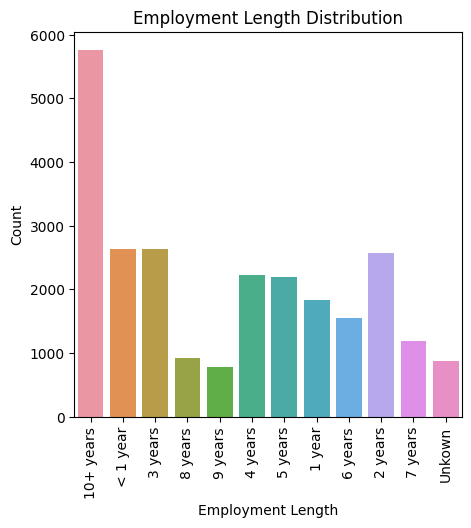

In [52]:
plt.figure(figsize=(5, 5))
sns.countplot(x=final_loan_data_cleaned["emp_length"])
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Employment Length Distribution')
plt.xticks(rotation = 90)
plt.show()

Home ownership vs loan status

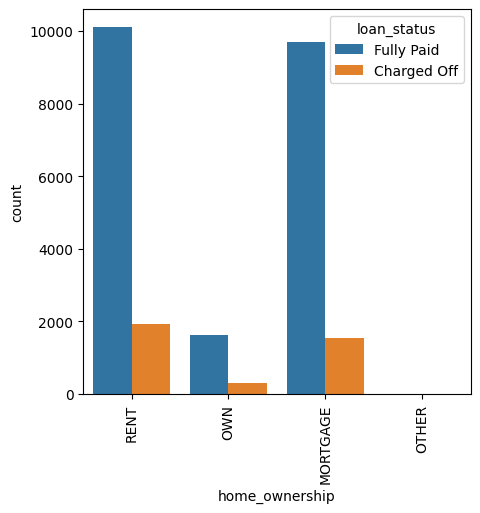

In [53]:
plt.figure(figsize=(5, 5))
sns.countplot(x='home_ownership',hue='loan_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

Loan amount vs loan status

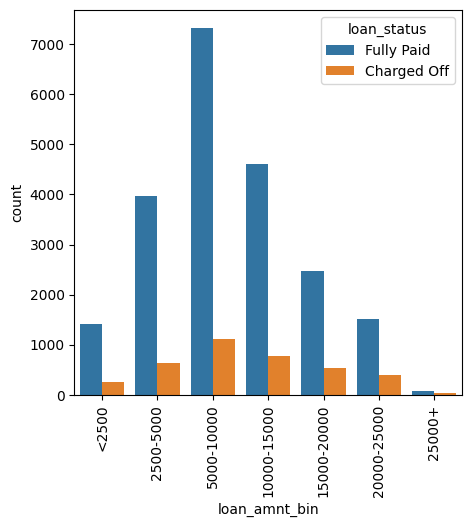

In [54]:
plt.figure(figsize=(5, 5))
final_loan_data_cleaned['loan_amnt_bin'] = pd.cut(final_loan_data_cleaned['loan_amnt'], [0, 2500, 5000, 10000, 15000, 20000, 25000,np.inf], labels=['<2500', '2500-5000', '5000-10000','10000-15000','15000-20000','20000-25000','25000+'])
sns.countplot(x='loan_amnt_bin',hue='loan_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

loan amount vs verification status

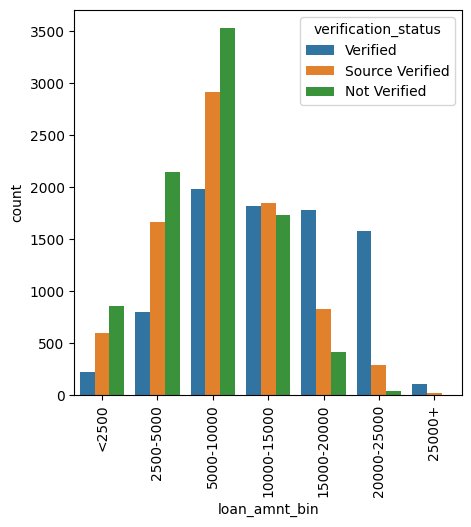

In [55]:
plt.figure(figsize=(5, 5))
sns.countplot(x='loan_amnt_bin',hue='verification_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

verification status vs loan status 

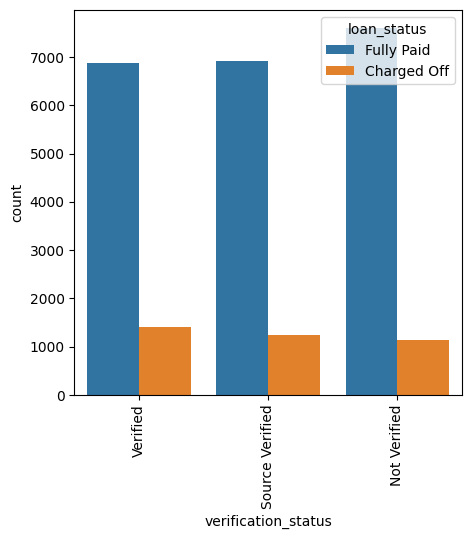

In [56]:
plt.figure(figsize=(5, 5))
sns.countplot(x='verification_status',hue='loan_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

Loan Term vs loan amount

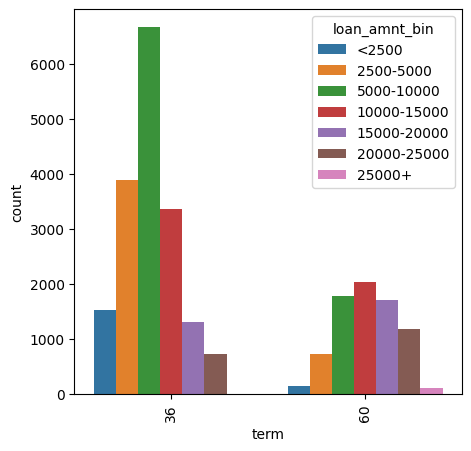

In [57]:
plt.figure(figsize=(5, 5))
sns.countplot(x='term',hue='loan_amnt_bin', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

Loan term vs loan status

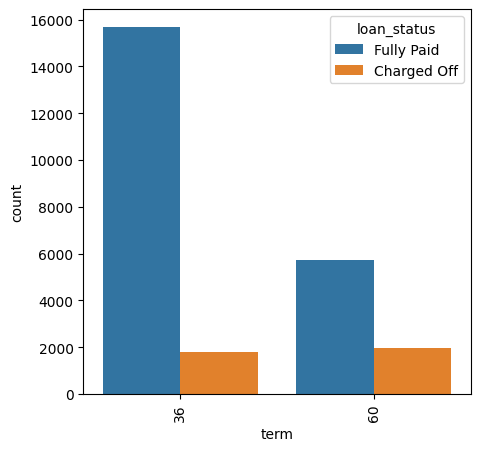

In [58]:
plt.figure(figsize=(5, 5))
sns.countplot(x='term',hue='loan_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

Home ownership vs loan amount

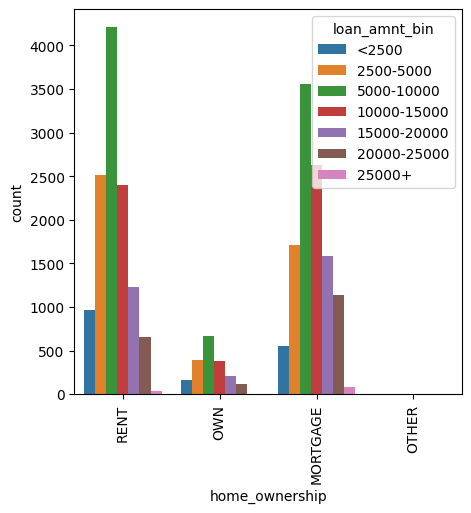

In [59]:
plt.figure(figsize=(5, 5))
sns.countplot(x='home_ownership',hue='loan_amnt_bin', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

public rec bankrupcies vs loan status 

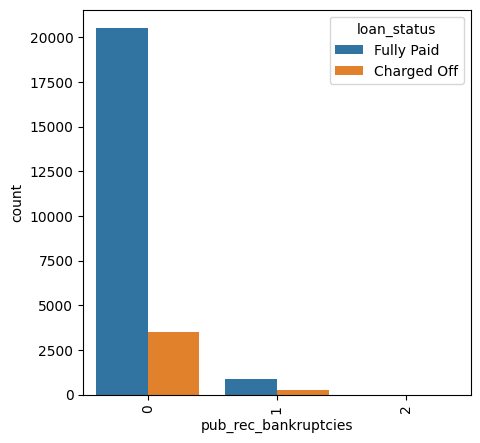

In [60]:
plt.figure(figsize=(5, 5))
sns.countplot(x='pub_rec_bankruptcies',hue='loan_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

public rec bankrupcies vs verification status

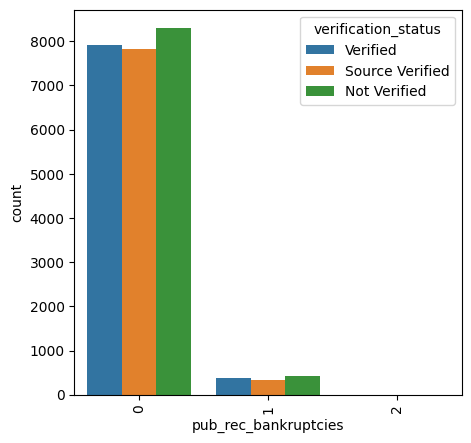

In [61]:
plt.figure(figsize=(5, 5))
sns.countplot(x='pub_rec_bankruptcies',hue='verification_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

Employment length vs loan status

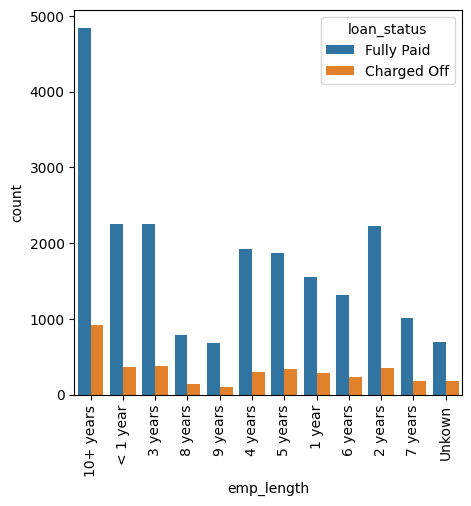

In [62]:
plt.figure(figsize=(5, 5))
sns.countplot(x='emp_length',hue='loan_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

Purpose vs Loan Status

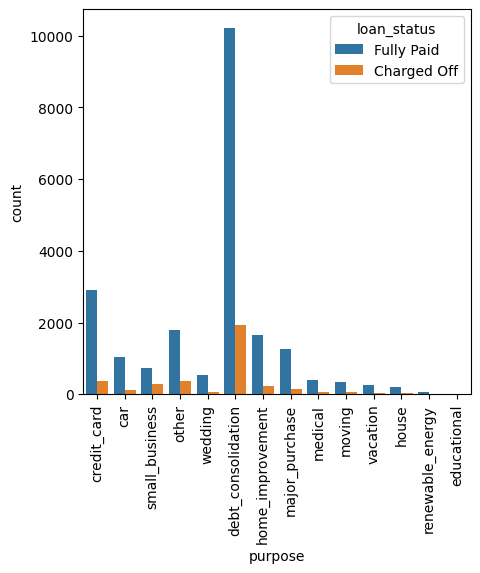

In [66]:
plt.figure(figsize=(5, 5))
sns.countplot(x='purpose',hue='loan_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

Purpose vs Loan amount

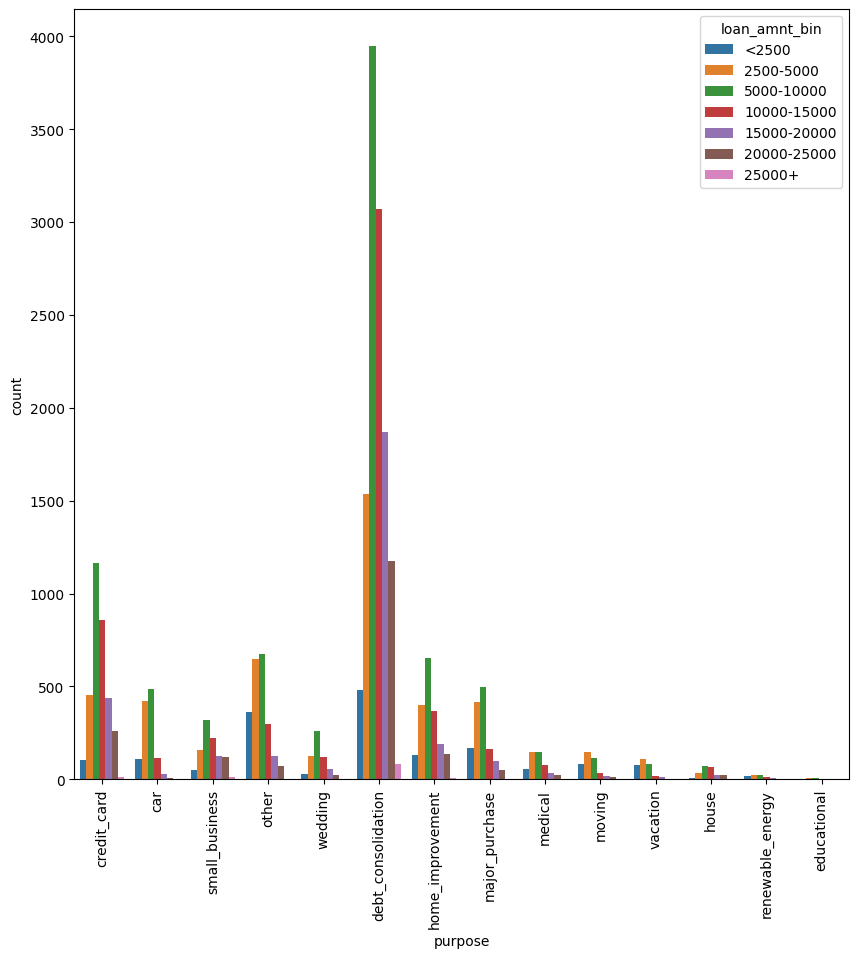

In [69]:
plt.figure(figsize=(10, 10))
sns.countplot(x='purpose',hue='loan_amnt_bin', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

Loan purpose vs Interest amount

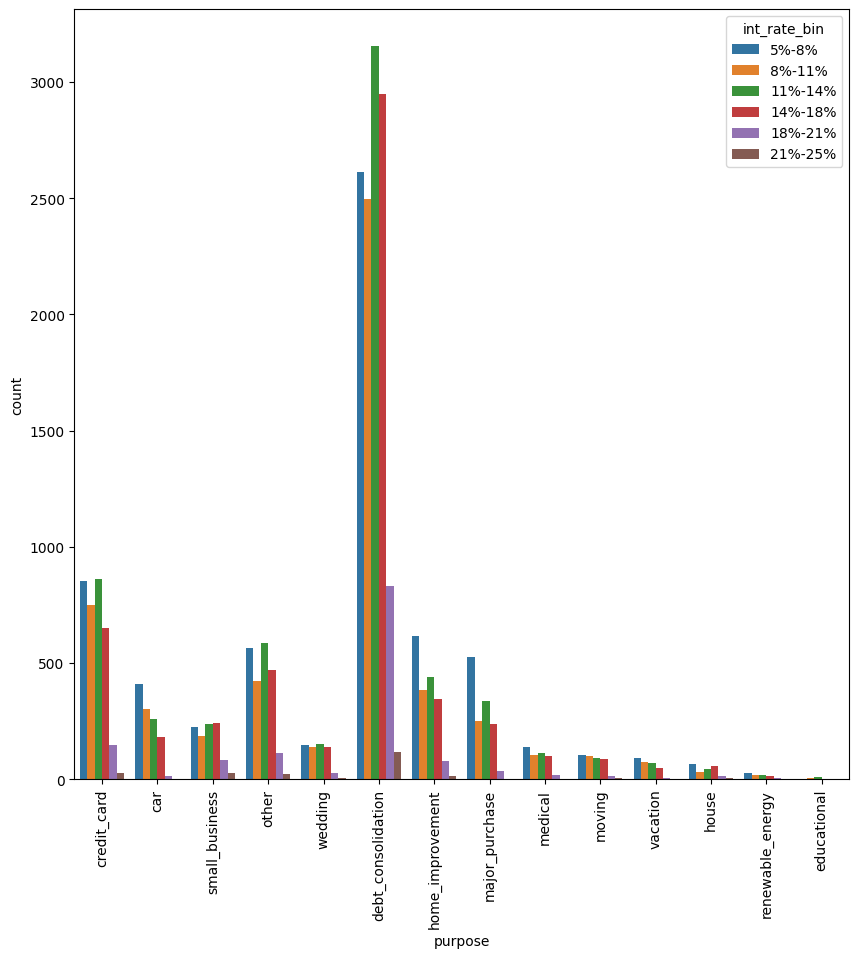

In [76]:
plt.figure(figsize=(10, 10))
final_loan_data_cleaned['int_rate_bin'] = pd.cut(final_loan_data_cleaned['int_rate'], [5, 8, 11, 14, 18, 21, 25], labels=['5%-8%', '8%-11%', '11%-14%','14%-18%','18%-21%','21%-25%'])
sns.countplot(x='purpose',hue='int_rate_bin', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()


# final_loan_data_cleaned.int_rate.describe()

year wise loan charged off vs fully paid

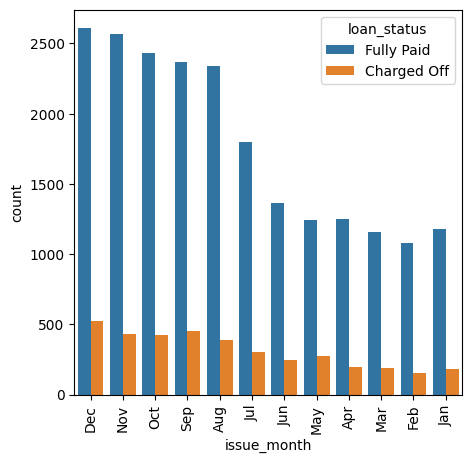

In [92]:
plt.figure(figsize=(5, 5))
final_loan_data_cleaned['issue_month'] = final_loan_data_cleaned['issue_d'].str[:3]
sns.countplot(x='issue_month',hue='loan_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

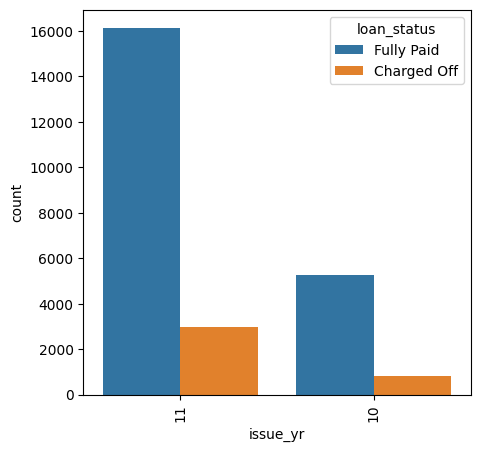

In [87]:
plt.figure(figsize=(5, 5))
final_loan_data_cleaned['issue_yr'] = final_loan_data_cleaned['issue_d'].str[-2:]
sns.countplot(x='issue_yr',hue='loan_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

Address vs Loan status

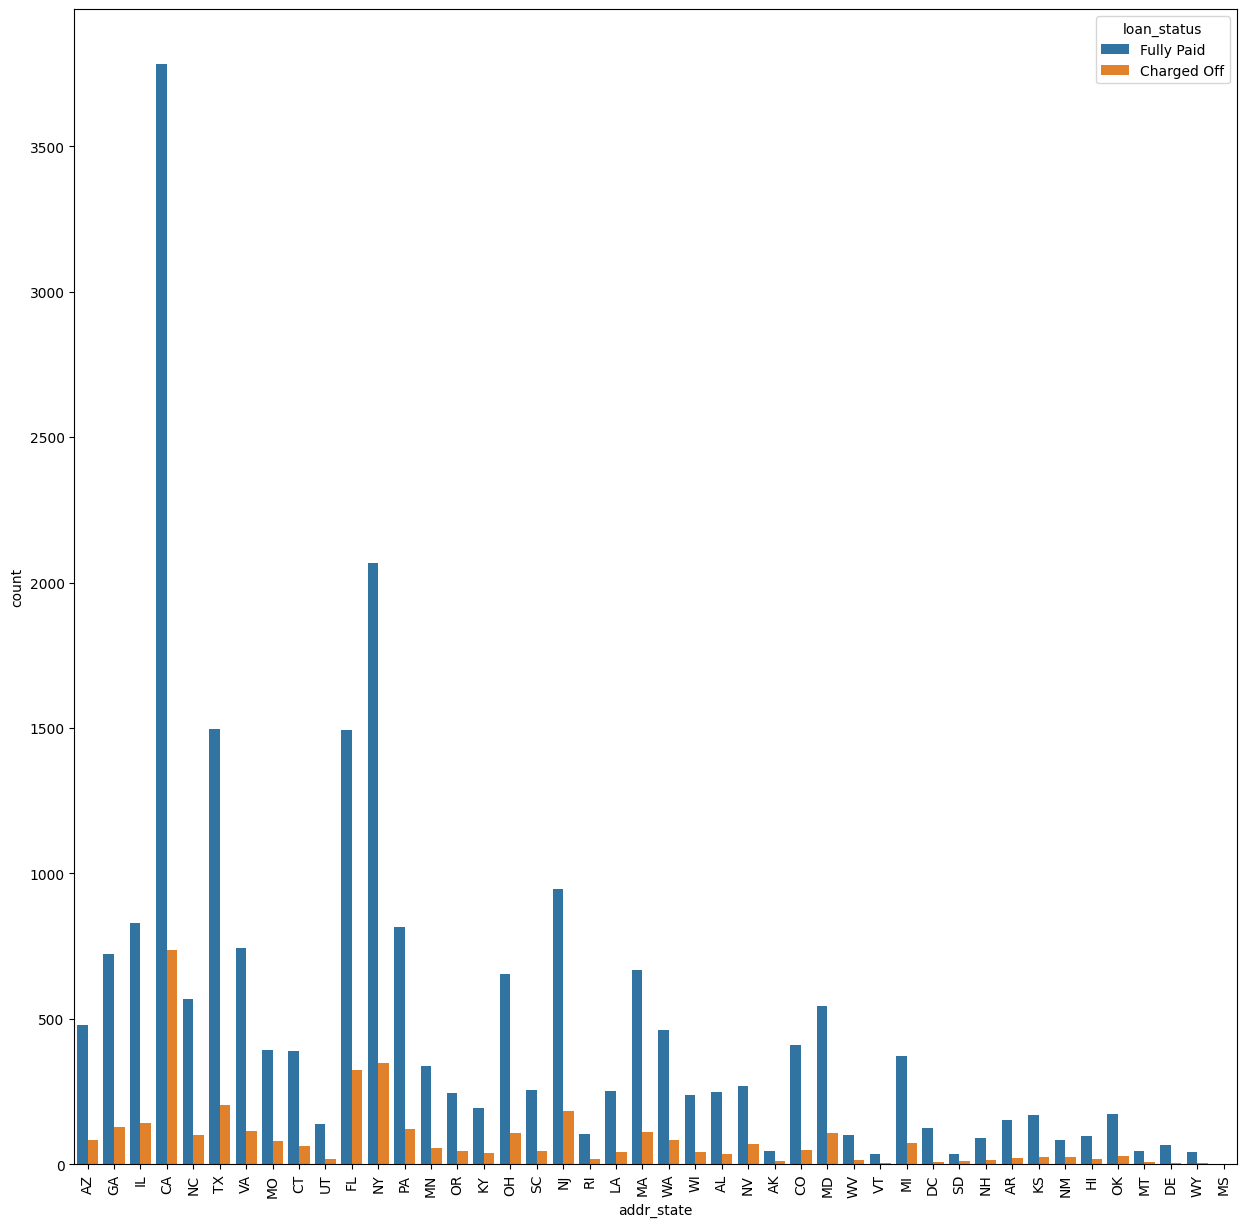

In [90]:
plt.figure(figsize=(15, 15))
sns.countplot(x='addr_state',hue='loan_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

Grade vs Loan status

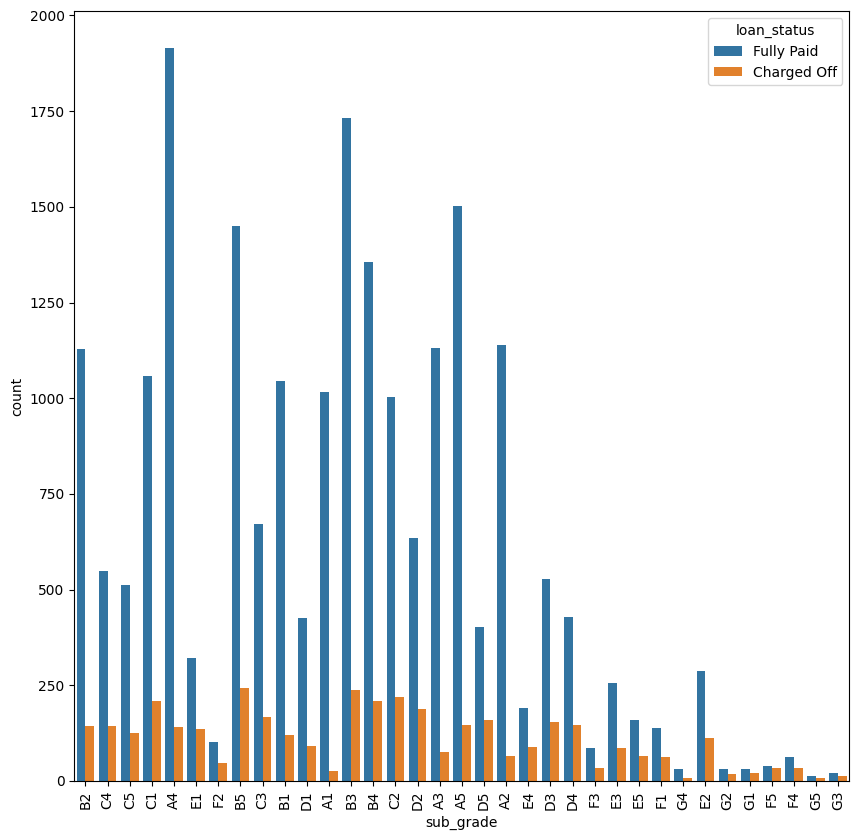

In [101]:
plt.figure(figsize=(10, 10))
sns.countplot(x='sub_grade',hue='loan_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

Income range vs Loan amount

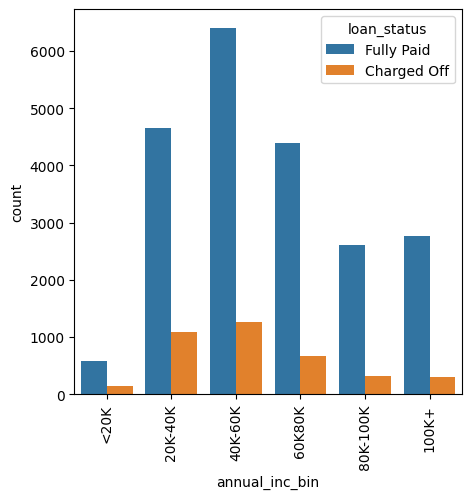

In [106]:
plt.figure(figsize=(5, 5))
final_loan_data_cleaned['annual_inc_bin'] = pd.cut(final_loan_data_cleaned['annual_inc'], [0, 20000, 40000, 60000, 80000, 100000, np.inf], labels=['<20K', '20K-40K', '40K-60K','60K80K','80K-100K','100K+'])
sns.countplot(x='annual_inc_bin',hue='loan_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

Annual Income vs loan amount

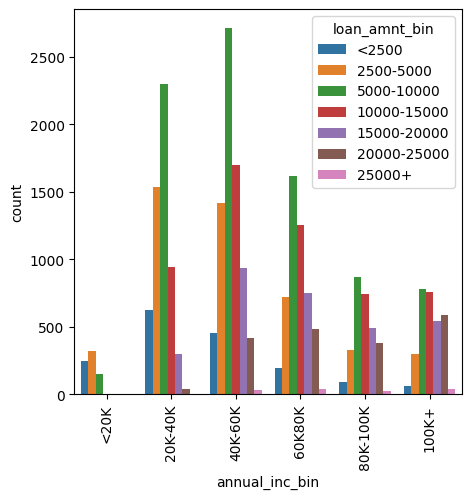

In [109]:
plt.figure(figsize=(5, 5))
sns.countplot(x='annual_inc_bin',hue='loan_amnt_bin', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

Annual Income vs verification status

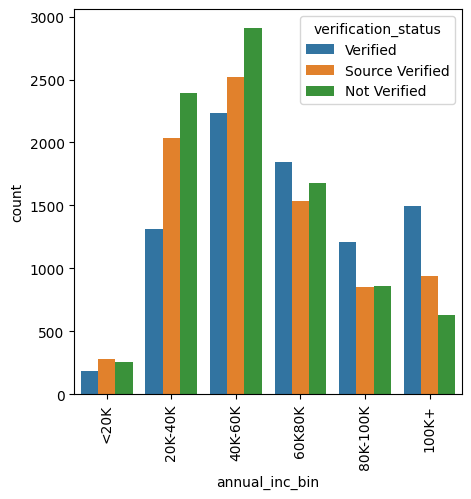

In [112]:
plt.figure(figsize=(5, 5))
sns.countplot(x='annual_inc_bin',hue='verification_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

Annual Income vs employee length

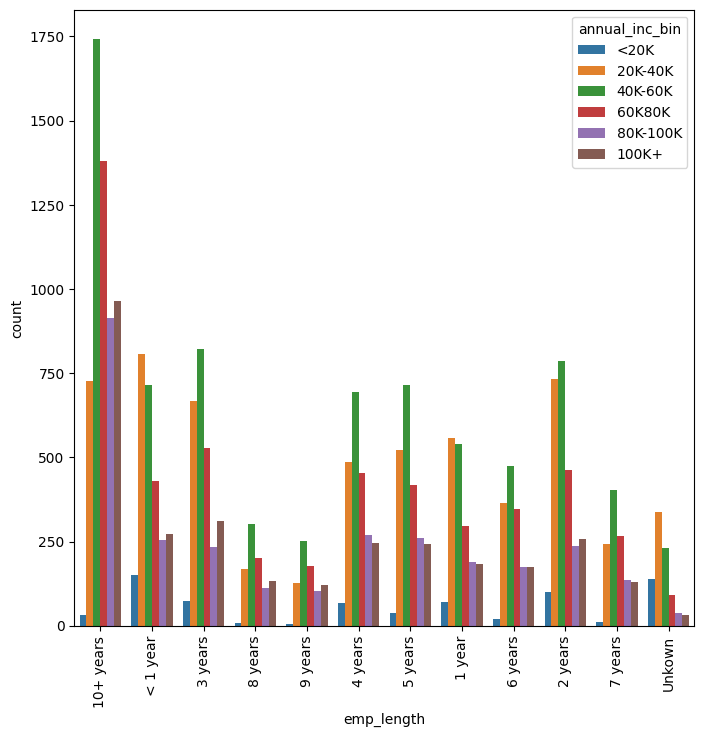

In [116]:
final_loan_data_cleaned.head(10)
plt.figure(figsize=(8, 8))
sns.countplot(x='emp_length',hue='annual_inc_bin', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()